<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Rodrigo Guerra
- Nombre de alumno 2: Mariano Suarez


### **Link de repositorio de GitHub:** `https://github.com/MarianoSuarez03/Laboratorios-Python`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Programación orientada a objetos.
- Programación funcional.
- Librería Numpy para manejo de datos en arreglos/tensores.

## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [3]:
df_retail = pd.read_pickle("/work/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable corresponde al estudio de una única variable, estudiando su distribución y resumen estadístico. Por otro lado, el análisis multivariable estudia el comportamiento de una variable con respecto a otras. Finalmente, el análisis de datos faltantes permite sumarizar y observar estos, encontrando patrones para el tratamiento de estos. Los 3 tipos de análisis nos permiten estudiar el comportamiento de las variables a utilizar, descubriendo anomalías en los datos como outliers o datos faltantes, para un correcto manejo de estos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [4]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [5]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Se observa los códigos de los invoices, con la cantidad de veces que estos aparecen, son las compras con mayor cantidad de productos de un usuario en la misma ida a comprar. La boleta con más productos tiene 625 productos distintos. Se observa una gran cantidad de duplicados, lo que está bien en esta categoría pues indica que hay muchas boletas con más de un producto, lo que es esperable en retail.

In [6]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

Los códigos de los productos más comprados en el dataset, 

In [7]:
df_retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

StockCode corresponde a un índice asociado a un producto, como se puede apreciar, existen un total de 4632 distintos productos siendo el producto '85123A' el más transado. Por otro lado, no existen valores nulos dentro de la serie, y se cuenta con un alto porcentaje de duplicados, debido a que mismos productos son comprados más de una vez.

Además, se observa que hay productos con código M, POST y DOT, los cuales son códigos muy distintos al resto, por lo que podría indicar un producto en particular que se planeaba marcar así, o errores en el ingreso de los datos.

In [8]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

La variable 'Description' corresponde a una descripción del producto comprado, existiendo 4682 descripciones distintas, un número mayor al 'StockCode', lo que podría indicar anomalías, sumado a lo anterior, el producto más vendido corresponde a 'WHITE HANGING HEART T-LIGHT HOLDER', con un total de 3549 ventas distintas, también mayor al 'StockCode' con mayores ventas únicas. Por otro lado, la segunda descripción para el producto con mayor ventas únicas corresponde al código 'nan', así como la categoría 'Manual', que no calzan con las demás descripciones de la base de datos.

In [9]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

La variable 'Quantity' contiene la cantidad de veces que se compra un mismo producto en la misma boleta, por lo que tiene sentido que existan muchos duplicados, pues en general en las compras se compran cantidades bajas de un mismo producto,  además, no hay ningún 0, lo que está bueno pues no hay productos que se compren 0 veces en una boleta y tampoco hay celdas con 'nan'. Sin embargo, 2.35% de la muestra negativa, lo que no es un comportamiento esperado, pues son cantidades de productos y estas deben ser siempre positivas.

Además, se observa una gran cantidad de outliers en la zona positiva, y es dificil que un mismo producto se compre más de 100 veces, por lo que esos es dificil que sean correctos. Luego de la limpieza de outliers, se observan valores más razonables para las cantidades de productos comprados, pero aún hay que filtrar para que solo existan valores mayores que 0.

In [10]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

'InvoiceDate' corresponde a la fecha reportada en el recibo de la transacción, esta variable indica las fechas de inicio y término para la muestra observada, siendos estas el 1 de diciembre de 2009 y 9 de diciembre de 2010. El histograma permite observar como las ventas aumentan durante el mes de noviembre.

In [11]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

La columna 'Price' indica el precio del producto en cuestión, se observa que hay valores menores que 0, lo que no estaría bien para esta columna. Además hay un gran cantidad de valores que son 0, lo que no indicaría que hay productos gratis, y probablemente sea un error. Además, se observan varios outliers que no representarían algo usual en productos de retail de la tienda (un producto de 1200).

El precio con mayor frecuencia se encuentra concentrado entre los 0.5 a 1.49. En la versión con outliers, casi no se puede apreciar el boxplot, pero de acuerdo con el boxplot de la versión sin outliers, la mediana se encuentra en 2.1, y los cuartiles están en 1.25 y 4.21.

In [12]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

La columna 'Customer ID' representa el código identificador del cliente, por lo que tiene sentido que existan muchos duplicados, pues por una misma compra de varios productos, el cliente se repetiría varias veces, además de que el mismo cliente puede realizar compras durante todo el año, entonces hay aún más repetición de datos. Se observa una gran cantidad de NaNs, lo que se puede deber a que los clientes no estén registrados en la tienda, o que sus pagos sean en efectivo de forma que no queden registrados.

In [13]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

La variable 'Country' reporta el país de los consumidores, como se puede apreciar, el Reino Unido corresponde al país de origen con más compradores, con un total de 485.852 consumidores, lo cuál supone que la tienda de retail en Europa, se encuentra en este país. Se destaca que la tienda tiene compras de un total de 40 paises distintos.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

## Bivariant Analysis:

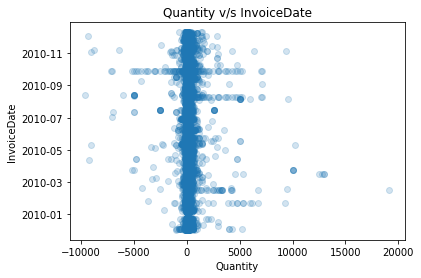

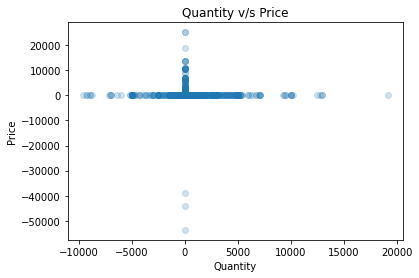

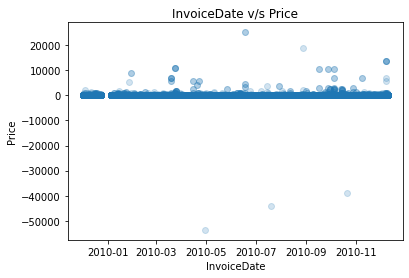

## Correlation:

## Missing Matrix:

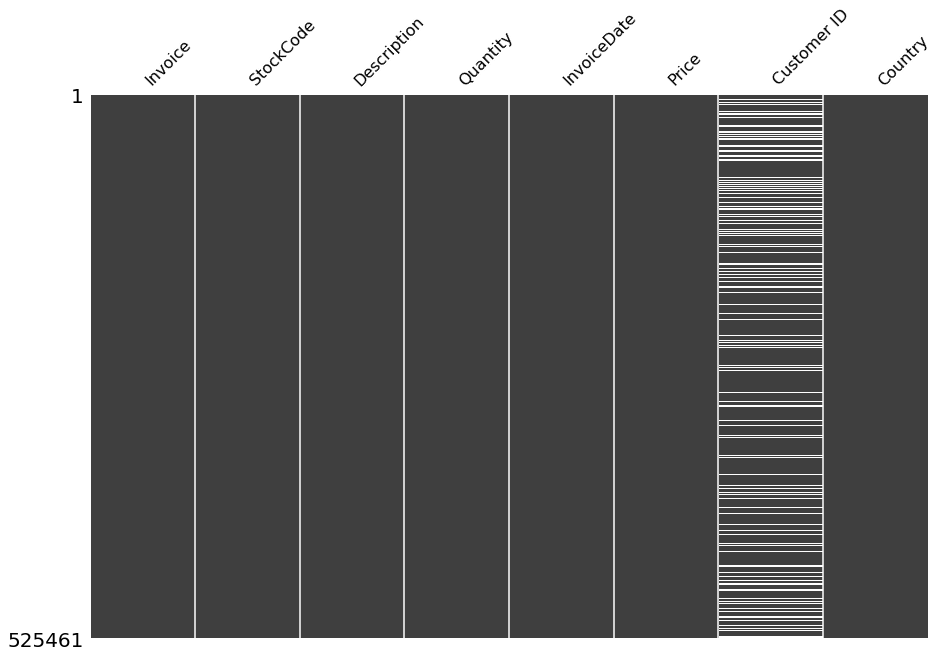

In [52]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]], alpha= 0.2)
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

## Bivariant Analysis:

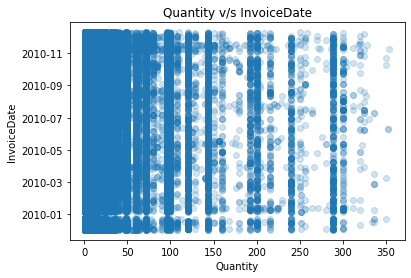

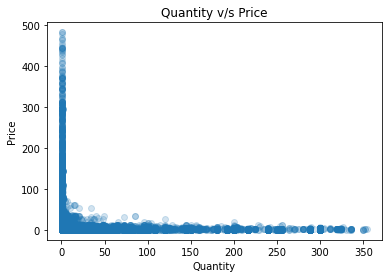

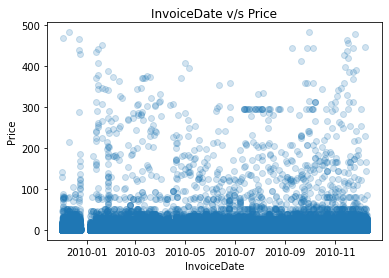

## Correlation:

## Missing Matrix:

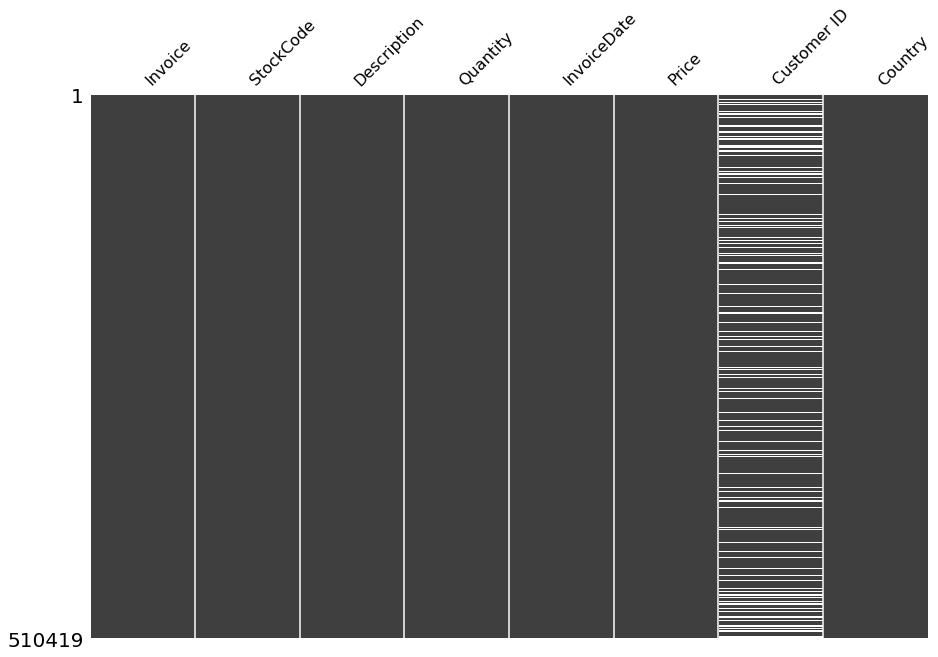

In [104]:
def limpieza_df(dataframe_in):
    df = dataframe_in.copy()
    df = df[(df['Price'] > 0)] #&(df['Price'] < 125)]
    df['Price'] = df['Price'].loc[(np.abs(stats.zscore(df['Price'])) < 5)]
    df = df[(df['Quantity'] > 0)]# &(df['Quantity'] < 100)]
    df['Quantity'] = df['Quantity'].loc[(np.abs(stats.zscore(df['Quantity'])) < 4)] 
    df = df.dropna(subset = ['Quantity', 'Price'])  

    return df


# limpieza_df(df_retail)
profile_df(limpieza_df(df_retail))

Se observa una regularidad en la variable Quantity para las distintas fechas, se observa que para Quantitys menores a 50 se compra todo el año, y para Quantities mayores a se observan patrones marcados cada 50, es decir en quantities cercanas a 100, 150, 200, etc. La principal diferencia con respecto al gráfico sin limpieza, es que ya no hay queantities negativas, y no se observa una gran cantidad de outliers, pues estos fueron filtrados de acuerdo al Zscore de la distribución.

Por otra parte, al comparar Quantity vs Price, se observan que hay productos que se compran en gran cantidad pero que son de bajo precio, mientras que los productos con altos precios se compran en bajas cantidades. Esto no se observaba antes de la limpieza, pues existían tanto quantities, como precios negativos, los cuales fueron filtrados, además de la remoción de outliers.

Además, el invoiceDate se arregla al filtrar los datos negativos, también, se observa que no hay ventas en año nuevo no hay ventas en año nuevo. 

En cuanto a la matriz de correlación se observa que price y Quantity tienen correlación negativa muy cercana a 0, que tiene que ver que a altos precios la gente no compra gran cantidad de esos productos en una misma compra, mientras que a pprecios bajos la gente si tiende a comprar una mayor cantidad de productos.

Por último, la missing matrix, se observa que solo la columna customerID presenta NaNs, debido a que esas personas no están registradas en el supermercado.

Al realizar el análisis univariado con el dataset limpio, se observa que la cantidad de datos disminuye desde 525 mil observaciones a 510 mil aproximadamente, lo cual se debe al filtrado de precios y quantities negativas. Esto se observa en cada perfil de serie del dataset. Por lo que los datos tienen mucho más sentido. Además, se eliminan los NaN que eistían en la columna Price. No se eliminan los NaN de la columna Customer ID, pues es información de clientes que no están registrados en el supermercado.

In [105]:
profile_serie(limpieza_df(df_retail)['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           510419
Unique                            20696
Top                              537434
Freq                                674
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   508476
Duplicate rows (%)              99.62 %
Total size in memory      6391526 bytes
dtype: object

In [106]:
profile_serie(limpieza_df(df_retail)['Description'])

## Description Profile

Type                                                  object
Number of observations                                510419
Unique                                                  4530
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3442
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        510243
Duplicate rows (%)                                   99.97 %
Total size in memory                           8166704 bytes
dtype: object

In [107]:
profile_serie(limpieza_df(df_retail)['Quantity'])

## Quantity Profile

Type                            float64
Number of observations         510419.0
Mean                           9.367279
Std                           21.240315
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                               354.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          75.489172
Skew                            7.50321
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510369
Duplicate rows (%)              99.99 %
Total size in memory      8166704 bytes
dtype: object

In [108]:
profile_serie(limpieza_df(df_retail)['Price'])

## Price Profile

Type                            float64
Number of observations         510419.0
Mean                           3.670614
Std                            8.385764
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                              483.15
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        1004.070577
Skew                          26.714112
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509672
Duplicate rows (%)              99.85 %
Total size in memory      8166704 bytes
dtype: object

In [109]:
profile_serie(limpieza_df(df_retail)['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         406644.0
Unique                           4296.0
Top                             14911.0
Freq                             5562.0
                                       
Missing cells                    103775
Missing cells (%)               20.33 %
Duplicate rows                   510328
Duplicate rows (%)              99.98 %
Total size in memory      5271390 bytes
dtype: object

In [110]:
profile_serie(limpieza_df(df_retail)['Country'])

## Country Profile

Type                              object
Number of observations            510419
Unique                                40
Top                       United Kingdom
Freq                              472487
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    510419
Duplicate rows (%)               100.0 %
Total size in memory       8166704 bytes
dtype: object

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [87]:
df_profit = limpieza_df(df_retail).copy()
df_profit['Profit'] = df_profit['Quantity'] * df_profit['Price']
df_profit = df_profit.groupby(['Description']).sum().sort_values('Profit',ascending= True).reset_index()

fig = px.bar(df_profit.tail(30), x='Profit', y='Description')
fig.show()



En primer lugar, el item que mayores ganancias entregas corresponde a REGENCY CAKESTAND 3 TIER el cual entrega ganancias de más de 166k, por otro lado, al comparar con la lista de productos más vendidos, dicho producto se encuentra segundo. Similarmente, el producto más vendido WHITE HANGING HEART T-LIGHT HOLDER se encuentra segundo en lo que a ventas refiere, con un total de 142k. Esto evidencia que no necesariamente los artículos vendidos son los mismos que los que generan mayores ganancias, pues para calcular esta última se utiliza el precio de los productos, lo cual cambia el ranking en cuestión.


### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [17]:
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [117]:
def plot_ventas(dataframe):
    df_ventas = limpieza_df(df_retail).copy()
    df_ventas['Profit'] = df_ventas['Quantity'] * df_ventas['Price']
    df_ventas = df_ventas.groupby([df_ventas['InvoiceDate'].dt.date]).sum().reset_index()
    fig = px.line(df_ventas, x='InvoiceDate', y='Profit')
    fig.show()

plot_ventas(df_retail)

Para graficar las ventas nuevamente se opta por calcular las ganancias como la multiplicación de los Precios de los productos, y la Cantidad vendida, posteriormente se calcula la suma de ganancias diarias, obteniendo el gráfico solicitado. Como se puede apreciar, la tendencia de las ganancias es al alza durante los meses de septiembre en adelante, lo cual era de esperarse debido a la cercanía con Navidad, obteniendo las mayores ventas el 15 de Noviembre de 2010. 

Las únicas irregularidades observadas dentro de los datos, corresponden a datos faltantes entre el 23 de Diciembre de 2009 y 4 de Enero de 2010. Finalmente, se puede observar la aleatoriedad de la serie de tiempo entre las ventas de un día a otro, 


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7cdb468a-4714-4314-8348-b2e2fb35010b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>